In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('data.csv')

In [4]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [9]:
#removing the unneccesorry columns

df.drop(['Engine Fuel Type','Market Category','Vehicle Size','Popularity','Vehicle Style','Number of Doors'],axis=1,inplace=True)

In [11]:
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [17]:
df.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders',
                   'Transmission Type':'Type','Driven_Wheels':'Mode','highway MPG':'MPG-H',
                   'city mpg':'MPG-C','MSRP':'Price'},inplace=True)
df.head(5)

,Make,Model,Year,HP,Cylinders,Type,Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [20]:
df.shape

(11914, 10)

In [21]:
duplicate_rows_df = df[df.duplicated()]
print("number of dupicate rows:", duplicate_rows_df.shape)

number of dupicate rows: (989, 10)


In [25]:
#removing duplicate values
df.drop_duplicates()

,Make,Model,Year,HP,Cylinders,Type,Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [24]:
df.count

<bound method DataFrame.count of           Make       Model  Year     HP  Cylinders       Type  \
0          BMW  1 Series M  2011  335.0        6.0     MANUAL   
1          BMW    1 Series  2011  300.0        6.0     MANUAL   
2          BMW    1 Series  2011  300.0        6.0     MANUAL   
3          BMW    1 Series  2011  230.0        6.0     MANUAL   
4          BMW    1 Series  2011  230.0        6.0     MANUAL   
...        ...         ...   ...    ...        ...        ...   
11909    Acura         ZDX  2012  300.0        6.0  AUTOMATIC   
11910    Acura         ZDX  2012  300.0        6.0  AUTOMATIC   
11911    Acura         ZDX  2012  300.0        6.0  AUTOMATIC   
11912    Acura         ZDX  2013  300.0        6.0  AUTOMATIC   
11913  Lincoln      Zephyr  2006  221.0        6.0  AUTOMATIC   

                    Mode  MPG-H  MPG-C  Price  
0       rear wheel drive     26     19  46135  
1       rear wheel drive     28     19  40650  
2       rear wheel drive     28     20  36

In [26]:
#removing null values
df.isnull().sum()

Make          0
Model         0
Year          0
HP           69
Cylinders    30
Type          0
Mode          0
MPG-H         0
MPG-C         0
Price         0
dtype: int64

In [27]:
df=df.dropna()

In [28]:
df.count

<bound method DataFrame.count of           Make       Model  Year     HP  Cylinders       Type  \
0          BMW  1 Series M  2011  335.0        6.0     MANUAL   
1          BMW    1 Series  2011  300.0        6.0     MANUAL   
2          BMW    1 Series  2011  300.0        6.0     MANUAL   
3          BMW    1 Series  2011  230.0        6.0     MANUAL   
4          BMW    1 Series  2011  230.0        6.0     MANUAL   
...        ...         ...   ...    ...        ...        ...   
11909    Acura         ZDX  2012  300.0        6.0  AUTOMATIC   
11910    Acura         ZDX  2012  300.0        6.0  AUTOMATIC   
11911    Acura         ZDX  2012  300.0        6.0  AUTOMATIC   
11912    Acura         ZDX  2013  300.0        6.0  AUTOMATIC   
11913  Lincoln      Zephyr  2006  221.0        6.0  AUTOMATIC   

                    Mode  MPG-H  MPG-C  Price  
0       rear wheel drive     26     19  46135  
1       rear wheel drive     28     19  40650  
2       rear wheel drive     28     20  36

In [29]:
df.isnull().sum()

Make         0
Model        0
Year         0
HP           0
Cylinders    0
Type         0
Mode         0
MPG-H        0
MPG-C        0
Price        0
dtype: int64

<AxesSubplot:xlabel='Cylinders'>

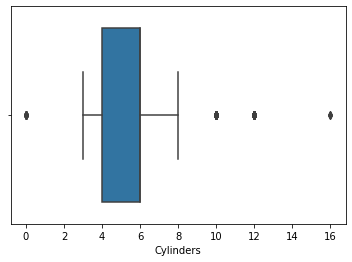

In [31]:
#removing outliers
#first we draw box plots and see the points which lie outside of the box and those will be the outliers.
sns.boxplot(x=df['Cylinders'])

<AxesSubplot:xlabel='HP'>

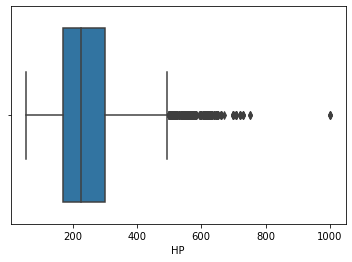

In [32]:
sns.boxplot(x=df['HP'])

<AxesSubplot:xlabel='Price'>

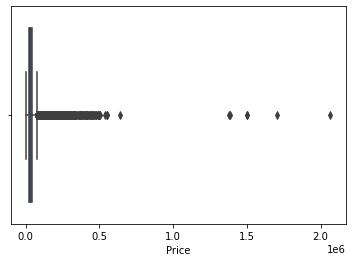

In [33]:
sns.boxplot(x=df['Price'])

In [34]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  #interquantile range 
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21215.0
dtype: float64


In [35]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9852, 10)

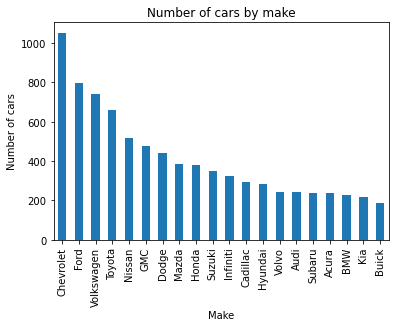

In [37]:
# it is often important to know who has the most number of cars.
df.Make.value_counts().nlargest(20).plot(kind='bar')
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

<AxesSubplot:>

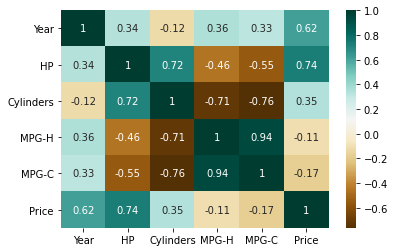

In [38]:
c=df.corr()
sns.heatmap(c,cmap='BrBG', annot= True)

<AxesSubplot:xlabel='HP', ylabel='Price'>

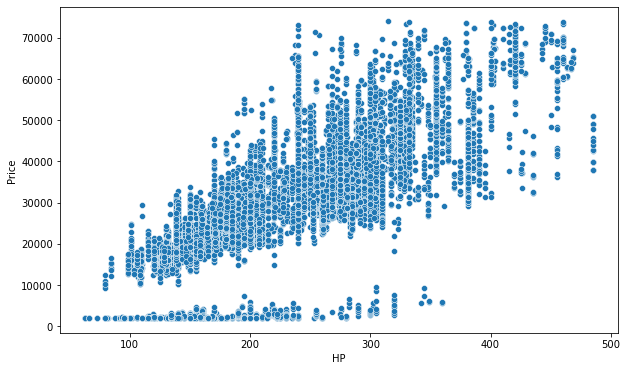

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='HP',y='Price',data=df)